In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [46]:
img=cv2.imread('image.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [47]:
print(img.shape)

(340, 720, 3)


In [48]:
#Flatten each channel R,G,B
all_pixels=img.reshape((img.shape[0]*img.shape[1],3))

In [49]:
print(all_pixels.shape)

(244800, 3)


In [51]:
dominant_colors=5
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
centers=km.cluster_centers_
print(centers)

[[ 96.64022338  59.56182126  86.90295236]
 [127.07831294 134.01630501 172.92161723]
 [ 75.03130483  28.00005013  48.54596722]
 [165.69256317 183.73362955 230.7500561 ]
 [104.05799758  99.13192638 132.10193988]]


In [53]:
#To convert from float to int since RGB values are integers
centers=np.array(centers,dtype='uint8') 

In [54]:
print(centers)

[[ 96  59  86]
 [127 134 172]
 [ 75  28  48]
 [165 183 230]
 [104  99 132]]


# Plot the colors for these RGB values

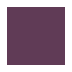

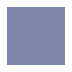

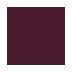

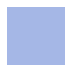

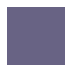

In [68]:
i=1
colors=[]
for each_color in centers:
    
    #Create a subplot
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_color
    plt.imshow(a)

    plt.show()

# Segmenting the original image

In [75]:
new_img=np.zeros(all_pixels.shape,dtype='uint8')
print(new_img.shape)

(244800, 3)


In [78]:
labels = km.labels_
print(labels.shape)
print(colors)

(244800,)
[array([96, 59, 86], dtype=uint8), array([127, 134, 172], dtype=uint8), array([75, 28, 48], dtype=uint8), array([165, 183, 230], dtype=uint8), array([104,  99, 132], dtype=uint8)]


In [79]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[km.labels_[i]]

In [80]:
new_img=new_img.reshape(img.shape)

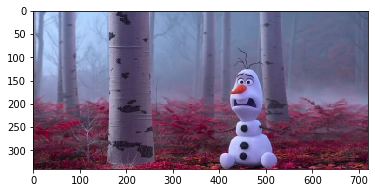

In [84]:
plt.imshow(img)
plt.show()

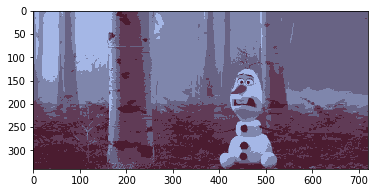

In [85]:
plt.imshow(new_img)
plt.show()